# HW2, COMS 4995_005, Deep Learning


## Part 1.1: Baseline CNN (50 points)
-  At least 2 convolutional layers followed by pooling layers.
-  At least one fully connected layer followed by a softmax layer. 
-  Use ReLu as your activation function.
-  Use Gradient descent as your optimizer.
-  You should get 70% accuracy on your test set.

Team member 1: Huibo Zhao (hz2480)<br>
Team member 2: Tingmeng Li (tl2758)

In [100]:
## %matplotlib inline
import scipy.misc
import sys
import tensorflow as tf
import math
import time
import numpy as np
import pickle
import copy
%matplotlib inline
import matplotlib.pyplot as plt

In [101]:
class Loader:
    
    def unpickle(self,file):
        with open(file, 'rb') as fo:
            dict = pickle.load(fo, encoding='bytes')
        return dict
    
    def load_train_data(self):
        '''
        loads training data: 50,000 examples with 3072 features
        '''
        X_train = None
        Y_train = None
        start = time.time()
        for i in range(1, 6):
            pickleFile = self.unpickle('cifar-10-batches-py/data_batch_{}'.format(i))
            dataX = pickleFile[b'data']
            dataY = pickleFile[b'labels']

            for k in range(len(dataX)):
            
                image = dataX[k].reshape(3, 32, 32)
                image = np.transpose(image, [1, 2, 0])
                
                if k == len(dataX)-1:
                    print("Loaded batch {}".format(i))
                    imgplot = plt.imshow(image)
                    plt.show()
                    end = time.time()
                    print ("time: {0:8.2f}".format(end - start))
                
                if X_train is None:
                    X_train = image
                else:
                    X_train = np.concatenate((X_train, image))
            
            if Y_train is None:
                Y_train = dataY
            else:
                Y_train = np.concatenate((Y_train, dataY))

        return X_train, Y_train

    def load_test_data(self):
        '''
        loads testing data: 10,000 examples with 3072 features
        '''
        X_test = None
        Y_test = None
        pickleFile = self.unpickle('cifar-10-batches-py/test_batch')
        dataX = pickleFile[b'data']
        dataY = pickleFile[b'labels']

        for k in range(len(dataX)):
            if k % 1000 == 0:
                    print("Loaded test {} images".format(k))
                    
            image = dataX[k].reshape(3, 32, 32)
            image = np.transpose(image, [1, 2, 0])
            if X_test is None:
                X_test = image
            else:
                X_test = np.concatenate((X_test, image))
        if Y_test is None:
            Y_test = np.array(dataX)
        else:
            Y_test = np.concatenate((Y_test, dataY))

        return X_test, Y_test

Loaded batch 1


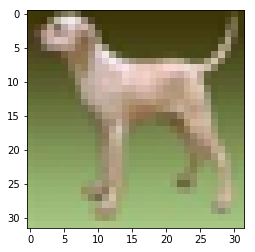

time:   147.66


KeyboardInterrupt: 

In [102]:
X_train,Y_train = Loader().load_train_data()
X_test, Y_test = Loader().load_test_data()

print("X_Train: {}" .format(X_train.shape))
print("Y_Train: {}".format(Y_train.shape))
print("X_Test: {}".format(X_test.shape))
print("Y_Test: {}".format(Y_test.shape))

In [ ]:
# global variables:
LABELS = {'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 
          'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}
EPOCH = 7

In [ ]:
class CNN():
    def __init__(self, model_fn, trainer, global_step=None):
        pass
    
    def run(self, Xd, Yd, epochs, batch_size, print_every, plot_losses, status):
        pass
    
    def train(self, Xd, Yd, epochs=1, batch_size=50, print_every=100, plot_losses=False):
        return self.run(Xd, Yd, epochs, batch_size, print_every, plot_losses, status='train')
    
    def validate(self, Xd, Yd, epochs=1, batch_size=50, print_every=100, plot_losses=False):
        return self.run(Xd, Yd, epochs, batch_size, print_every, plot_losses, status='validate')
    
    def predict(self, Xd):
        pass

In [ ]:
def model_fn(layer_input, labels, is_training):
    pass

trainer = tf.train.GradientDescentOptimizer(learning_rate=0.03)
cnn = CNN(model_fn, trainer)


In [ ]:
for i in range(EPOCH):
    print('train: epoch %d' % i)
    cnn.train(X_trn, y_trn, epochs=1, batch_size=50, print_every=100, plot_losses=False)
    print('validation')
    cnn.validate(X_val, y_val, epochs=1, batch_size=y_val.shape[0])

In [ ]:
y_predict = cnn.predict(X_test)
print (y_predict)